In [4]:
import numpy as np 
from scipy.special import gammaincinv
from astropy.modeling import models, custom_model
from petrofit.models import sersic_enclosed, sersic_enclosed_inv
from petrofit.models import petrosian_profile, sersic_enclosed
from petrofit.petrosian import Petrosian, PetrosianCorrection
from petrofit.models import make_grid
from petrofit.utils import closest_value_index, get_interpolated_values
from astropy.modeling import models, fitting, powerlaws

%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'
#plt.rcParams.update({'font.size': 17})


import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [5]:
def savefig(filename):
    plt.savefig("plots/"+filename, dpi=70, bbox_inches = 'tight', pad_inches = 0.2)

# Effective Radius and Intensity ($r_e$  and $I_{e}$)

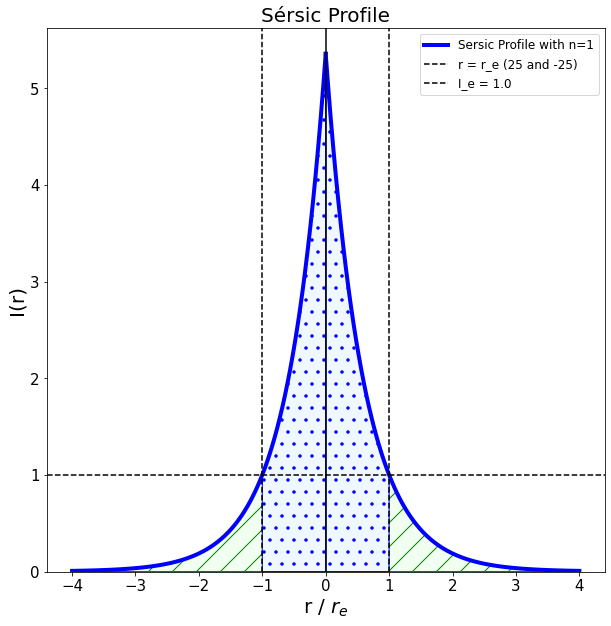

In [8]:
r_eff=25
n = 1 
model = models.Sersic1D(r_eff=r_eff, n=n)

r_list = np.arange(0, 101, 1)

x_array = r_list/r_eff
plt.plot(x_array, model(r_list), c='b', linewidth=4, label="Sersic Profile with n={}".format(n))
plt.plot(-x_array, model(r_list), c='b', linewidth=4)

alpha = 1

plt.fill_between(x_array,model(r_list), color='honeydew', hatch='/', edgecolor='green', alpha=alpha)
plt.fill_between(-x_array,model(r_list), color='honeydew', hatch='/', edgecolor='green', alpha=alpha)

r_eff_list = np.arange(0, r_eff+1, 1)
plt.fill_between(r_eff_list/r_eff,model(r_eff_list), color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)
plt.fill_between(-r_eff_list/r_eff,model(r_eff_list), color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)


plt.axvline(1, c='black', label='r = r_e ({} and -{})'.format(r_eff, r_eff), linestyle='--')
plt.axvline(-1, c='black', linestyle='--')
plt.axvline(c='black')

plt.axhline(1, c='black', linestyle='--', label='I_e = {}'.format(model.amplitude.value))


plt.title("Sérsic Profile")
plt.xlabel("r / $r_{e}$")
plt.ylabel("I(r)")
plt.legend()
plt.ylim(0, None)
#plt.xlim(-100, 100)


# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# import numpy as np

# @ticker.FuncFormatter
# def major_formatter(x, pos):
#     label = str(int(abs(x)))
#     return label

# ax = plt.gca()

# ax.xaxis.set_major_formatter(major_formatter)

savefig("sersic_radii.png")
plt.show()



# Curve of Growth

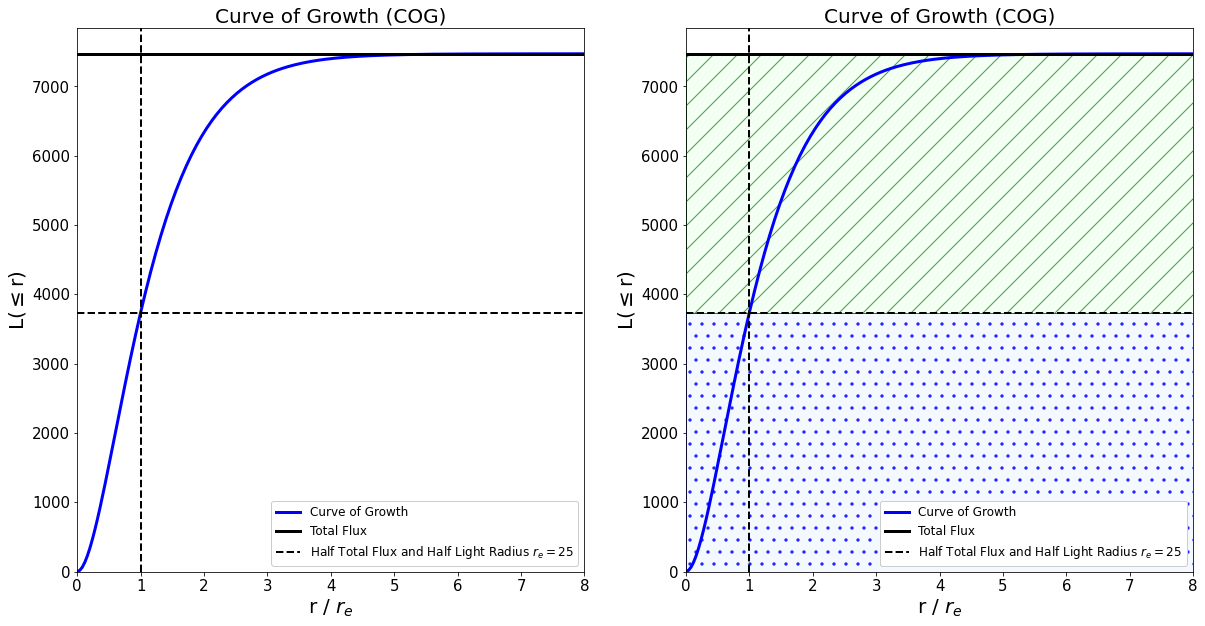

In [34]:
r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
total_flux = sersic_enclosed(np.inf, amplitude, r_eff, n)


x_array = r_list/r_eff

f, ax = plt.subplots(1,2, figsize=[20,10])
for i in range(2):
    plt.sca(ax[i])
    plt.plot(x_array, flux_list, c='Blue', linewidth=3, label='Curve of Growth')

    plt.axhline(total_flux, c='black', linestyle='-', linewidth=3, label='Total Flux')
    
    plt.axhline(total_flux/2, c='black', linestyle='--', linewidth=2,)
    plt.axvline(1, c='black', linestyle='--', linewidth=2, label='Half Total Flux and Half Light Radius $r_e = {}$'.format(r_eff))

    eff = flux_list.copy()
    eff[r_eff:] = total_flux/2
    

    if i == 1:
        alpha = 0.75
        plt.fill_between(x_array, np.zeros_like(eff)+eff[-1], color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)
        plt.fill_between(x_array, np.zeros_like(eff)+flux_list[-1], np.zeros_like(eff)+eff[-1], color='honeydew', hatch='/', edgecolor='green', alpha=alpha)



    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh._legmarker.set_alpha(1)
        lh.set_alpha(1)

    plt.title("Curve of Growth (COG)")
    plt.xlabel("r / $r_{e}$")
    plt.ylabel("L($\leq$r)")
    legend = plt.legend()
    legend.get_frame().set_alpha(None)
    plt.ylim(0, None)
    plt.xlim(0, max(x_array))


savefig("sersic_cog.png")
plt.show()

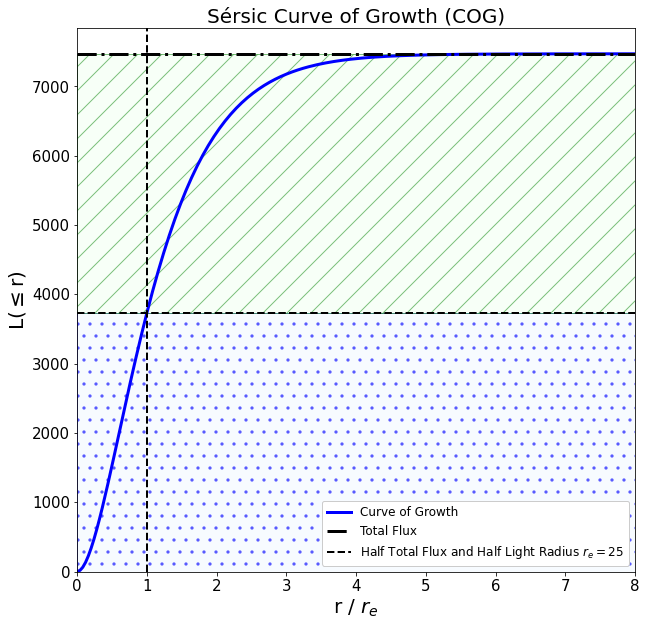

In [35]:
r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
total_flux = sersic_enclosed(np.inf, amplitude, r_eff, n)
x_array = r_list/r_eff

i = 1
plt.plot(x_array, flux_list, c='blue', linewidth=3, label='Curve of Growth')

plt.axhline(total_flux, c='black', linestyle='-.', linewidth=3, label='Total Flux')

plt.axhline(total_flux/2, c='black', linestyle='--', linewidth=2,)
plt.axvline(1, c='black', linestyle='--', linewidth=2, label='Half Total Flux and Half Light Radius $r_e = {}$'.format(r_eff))

eff = flux_list.copy()
eff[r_eff:] = total_flux/2

if i == 1:
    alpha = 0.5
    plt.fill_between(x_array, np.zeros_like(eff)+eff[-1], color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)
    plt.fill_between(x_array, np.zeros_like(eff)+flux_list[-1], np.zeros_like(eff)+eff[-1], color='honeydew', hatch='/', edgecolor='green', alpha=alpha)


leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)
    lh.set_alpha(1)

plt.title("Sérsic Curve of Growth (COG)")
plt.xlabel("r / $r_{e}$")
plt.ylabel("L($\leq$r)")
legend = plt.legend()
legend.get_frame().set_alpha(None)
plt.ylim(0, None)
plt.xlim(0, max(x_array))



savefig("sersic_single_cog.png")
plt.show()

# Sersic Index ($n$)

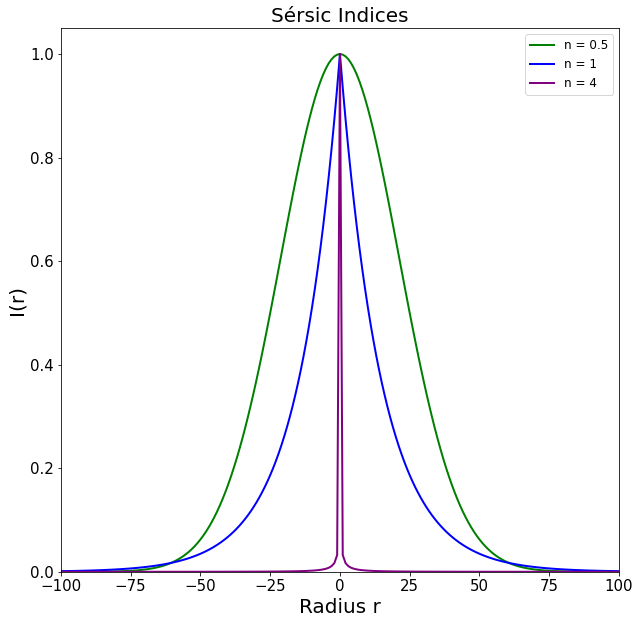

In [36]:
r_eff=25
n = 1 


r_list = np.arange(0, 101, 1)


for line_style, c, n in zip(['-','-','-'], ['g', 'b', 'purple'],[0.5, 1, 4]):
    
    b_n = gammaincinv(2. * n, 0.5)
    model = models.Sersic1D(amplitude=1/np.exp(b_n),  r_eff=r_eff, n=n)
    
    plt.plot(r_list, model(r_list), c=c, linewidth=2, label="n = {}".format(n), linestyle=line_style)
    plt.plot(-r_list, model(r_list), c=c, linewidth=2, linestyle=line_style)


plt.title("Sérsic Indices")
plt.xlabel("Radius r")
plt.ylabel("I(r)")
plt.legend()
plt.ylim(0, None)
plt.xlim(-100, 100)

savefig("sersic_index.png")
plt.show()


# Petrosian Profiles 

/mnt/c/Users/robel/project/repo/petrofit/petrofit/models.py:311: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(-x) * x ** (2 * n)) / (2 * n * g)


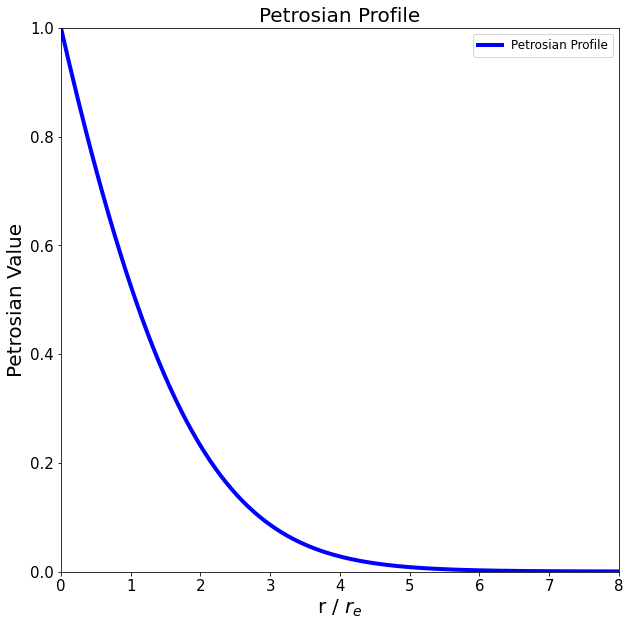

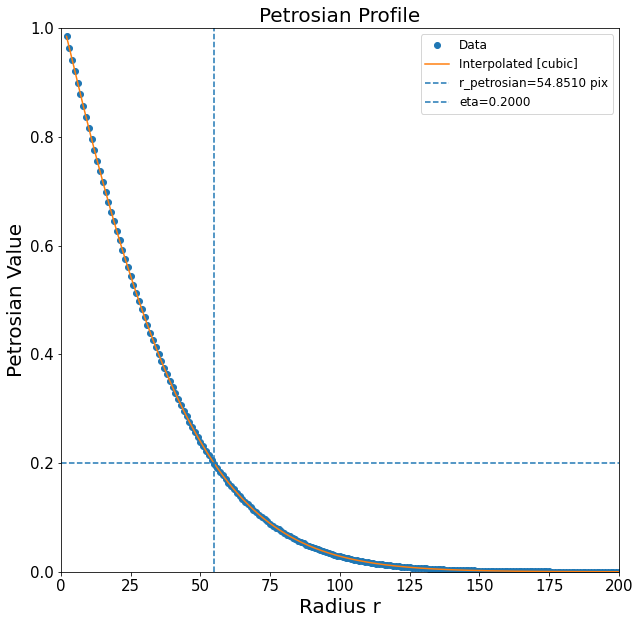

In [37]:
r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

x_array = r_list/r_eff

petro_list = petrosian_profile(r_list, r_eff, n)
petro_list[0] = 1

plt.plot(x_array, petro_list, color="b", linewidth=4, label='Petrosian Profile')


plt.title("Petrosian Profile")
plt.xlabel("r / $r_{e}$")
plt.ylabel("Petrosian Value")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, max(x_array))


savefig("sersic_petrosian.png")


plt.show()
flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
area_list = np.pi * r_list**2 

p = Petrosian(r_list[1:], area_list[1:], flux_list[1:],)

p.plot()

plt.title("Petrosian Profile")
plt.xlabel("Radius r")
plt.ylabel("Petrosian Value")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, max(r_list))

savefig("sersic_petrosian_eta.png")



# Petrosian Corrections 

In [34]:
#c_relation = models.Polynomial1D(6, c0=0.96876259, c1=-1.19256948, c2=2.00776737, c3=-0.94167389, c4=0.23381722, c5=-0.02912205, c6=0.00152013)
#c2080_to_n =  models.Polynomial1D(5, c0=30.90931031, c1=7.85656083, c2=0.59337868, c3=0.13433031, c4=-0.00547197, c5=0.00060374) + models.Exponential1D(amplitude=-31.79712211, tau=4.49847864)
#n_to_epsilon =  models.Polynomial1D(5, c0=-6.6685413, c1=-2.21463254, c2=-0.28551876, c3=-0.04461414, c4=-0.00019302, c5=-0.00024406) + models.Exponential1D(amplitude=7.61912353, tau=2.69252412)
c_relation = models.Polynomial1D(6, c0=2.26194802, c1=-3.61130833, c2=3.8219758, c3=-1.64146601, c4=0.38059409, c5=-0.0450384, c6=0.00221922)
c2080_to_n = models.Polynomial1D(5, c0=-0.41844073, c1=0.20487513, c2=0.08626531, c3=0.01067072, c4=-0.00082523, c5=0.00002486)
n_to_epsilon = models.Polynomial1D(5, c0=-6.54870813, c1=-2.15040843, c2=-0.28993623, c3=-0.04099376, c4=-0.00046837, c5=-0.00022305) + models.Exponential1D(amplitude=7.48787292, tau=2.6876055)


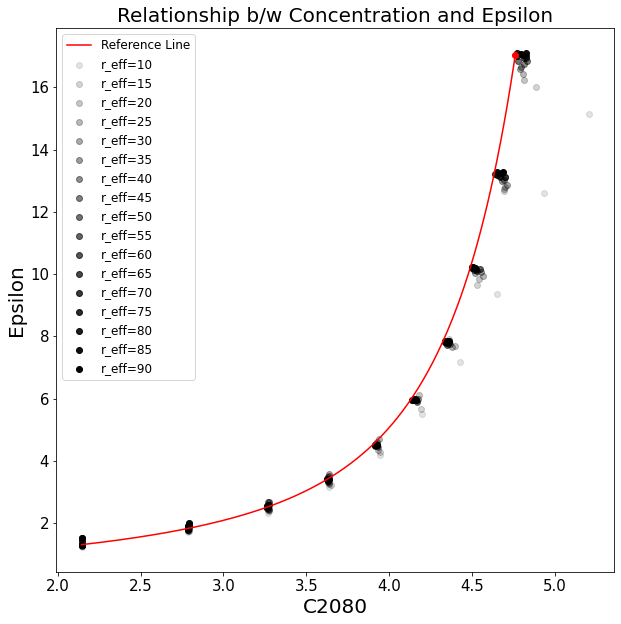

range_c2080 = (2.14, 4.72)


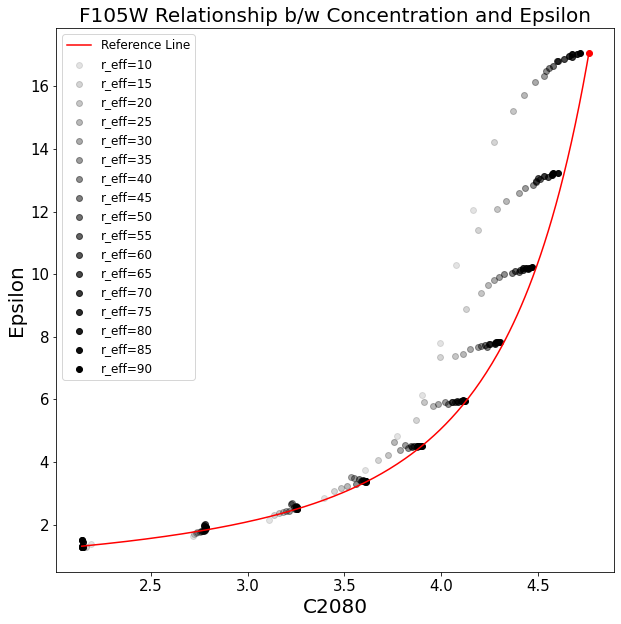

In [73]:
pc = PetrosianCorrection("plot_correction_gid_no_psf.yaml")

keyx = 'c_index'
keyy = 'epsilon'

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    
    key_data_x = np.array(data[keyx])
    key_data_y = np.array(data[keyy])
    
#     idx = np.where(key_data_x < 4)
#     key_data_x = key_data_x[idx]
#     key_data_y = key_data_y[idx]
    
    plt.scatter(key_data_x, key_data_y, c='black', alpha=a, label='r_eff={}'.format(key))

    x += list(key_data_x)
    y += list(key_data_y)

x = np.array(x)
y = np.array(y)

# # initialize a linear fitter
fit = fitting.LevMarLSQFitter()
# # initialize a linear model

line_init = models.Exponential1D() * powerlaws.BrokenPowerLaw1D() * models.Polynomial1D(5)
#fitted_line = fit(line_init, x, y, maxiter=10000, acc=1e-07,)

#fitted_line = fit(n_to_epsilon, c2080_to_n(c_relation(x)), y, maxiter=1000000, acc=1e-07,)

fitted_line = lambda x: n_to_epsilon(c2080_to_n(c_relation(x)))

key_red = 50
#data_red = pc.grid[key_red]
#red_x, red_y = get_interpolated_values(key_data_x, key_data_y)

red_x = np.arange(x.min(), 4.77, 0.01)
#plt.plot(red_x, red_y,  c='red', label='Reference (No PSF r_eff={})'.format(key_red))

plt.plot(red_x, fitted_line(red_x), c='red', label='Reference Line')
plt.scatter(red_x[-1], fitted_line(red_x[-1]), c='red')

plt.title("Relationship b/w Concentration and Epsilon")
plt.xlabel("C2080")
plt.ylabel("Epsilon")
plt.legend()

savefig("concentration_index_vs_epsilon.png")

plt.show()
#########################################################

pc = PetrosianCorrection("plot_correction_gid.yaml")

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    key_data_x = np.array(data[keyx])
    key_data_y = np.array(data[keyy])
    
#     idx = np.where(key_data_x < 4)
#     key_data_x = key_data_x[idx]
#     key_data_y = key_data_y[idx]
    
    plt.scatter(key_data_x, key_data_y, c='black', alpha=a, label='r_eff={}'.format(key))

    x += list(key_data_x)
    y += list(key_data_y)

x = np.array(x)
y = np.array(y)

plt.plot(red_x, fitted_line(red_x), c='red', label='Reference Line')
plt.scatter(red_x[-1], fitted_line(red_x[-1]), c='red')
#plt.plot(red_x, red_y,  c='red', label='Reference (No PSF r_eff={})'.format(key_red))

plt.title("F105W Relationship b/w Concentration and Epsilon")
plt.xlabel("C2080")
plt.ylabel("Epsilon")
plt.legend()

savefig("f105w_concentration_index_vs_epsilon.png")

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()
    

In [280]:
t_raw4 = Table.read('pure_grid_fine_petro_const_4.csv')[18::10] 
t_raw3 = Table.read('pure_grid_fine_petro_const_3.csv')

In [290]:
math = 100*(t_raw3['corr_c2080']-t_raw4['corr_c2080'])/t_raw4['corr_c2080']
idx = np.where(math > 0.01)
math[idx]

0.010317730556261343
0.010708608007238798
0.010315032653850026
0.011683933989214728
0.012193343855393491
0.015453972231148333
0.015705817587948496
0.013508167097202081
0.012241466810700445
0.017413042457799628
0.01717108372889012


In [311]:
from astropy.table import Table

t_raw = Table.read('pure_grid_fine_petro_const_3.csv')

t = t_raw[np.where(t_raw['sersic_n'] <=15)].copy()


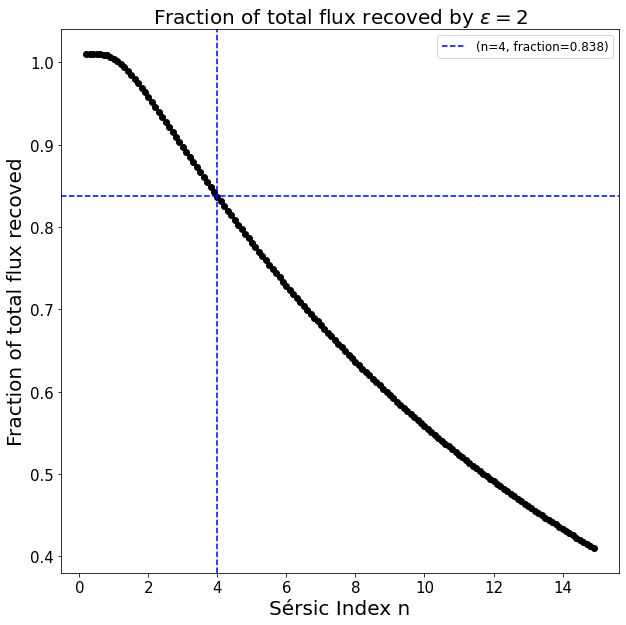

In [318]:
plt.scatter(t['sersic_n'], t['uncorr_total_flux']/t['corr_total_flux'], c='black')

plt.axvline(4, linestyle='--', label='(n=4, fraction=0.838)', c='b')
plt.axhline(0.838, linestyle='--', c='b')

plt.xlabel('Sérsic Index n')
plt.ylabel('Fraction of total flux recoved')
plt.title('Fraction of total flux recoved by $\epsilon = 2$')
plt.legend()
#|plt.axhline(1)

In [1]:
# @custom_model
# def missing_mag(x, p1=5.1e-4, p2=1.451):
#     return p1*np.exp(x**p2) 

In [2]:
# t_raw = Table.read('pure_grid_fine_petro_const_3.csv')

# t = t_raw[np.where(t_raw['sersic_n'] <=15)].copy()
# t = t[np.where(t['sersic_n'] >= 0.1)].copy()

# x = t['uncorr_r_90'] / t['uncorr_r_50']
# y = (-2.5*np.log10(t['uncorr_total_flux'])) - (-2.5*np.log10(t['corr_total_flux']))
# z = missing_mag()(x)
# n = t['sersic_n']

# plt.scatter(n, y, c='black')
# plt.plot(n, z, c='r')
# plt.show()

# plt.plot(n, (z-y))

# plt.axhline(0.01)
# plt.axhline(-0.01)


# plt.show()

# ###################################################

# line_init = missing_mag()
# line_init = models.Exponential1D() + models.Polynomial1D(3)

# fitted_line = fit(line_init, x, y, maxiter=10000, acc=1e-07,)
# print(fitted_line)

# plt.scatter(n, y, c='black')
# plt.plot(n, fitted_line(x), c='r')


# plt.show()

# plt.plot(n, (fitted_line(x)-y))

# plt.axhline(0.01)
# plt.axhline(-0.01)


# plt.show()


In [90]:
# import numpy as np 
# from petrofit.petrosian import PetrosianCorrection
# from astropy.modeling import models, fitting

# %matplotlib inline

# from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 10]
# plt.rcParams['image.origin'] = 'lower'

# pc = PetrosianCorrection("concentration_index_grid_no_psf.yaml")

# keyx = 'c_index'
# keyy = 'n'

# x = []
# y = []

# for i, key in enumerate(list(pc.grid.keys())[:]):
#     if key < 10 or key > 90:
#         continue
#     a = (i+2) / len(pc.grid)
#     data = pc.grid[key]
#     plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

#     x += data[keyx]
#     y += data[keyy]

# x = np.array(x)
# y = np.array(y)

# #plt.plot(data[keyx], 10.0**(-1.7) * np.array(data[keyx])**3.5)

# # initialize a linear fitter
# fit = fitting.LevMarLSQFitter()
# # initialize a linear model
# line_init = models.Exponential1D() + models.Const1D()
# fitted_line = fit(line_init, x, y)

# print(fitted_line.param_names)
# print(fitted_line.parameters)

# arr = np.arange(x.min()*0.99, x.max()*1.01, 0.1)
# #line_init = models.Exponential1D() + models.Const1D()
# plt.plot(arr, fitted_line(arr), c='red', label='Fitted Exponential'.format(*fitted_line.parameters))
# #plt.plot(arr, 0.1102*np.exp(arr/1.25))

# plt.title("Relationship b/w Concentration Index and Sersic Index")
# plt.xlabel("C2080")
# plt.ylabel("Sersic Index n")
# plt.legend()

# savefig("concentration_index_vs_n.png")

# print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

# plt.show()

In [91]:
# import numpy as np 
# from petrofit.petrosian import PetrosianCorrection
# from astropy.modeling import models, fitting

# %matplotlib inline

# from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 10]
# plt.rcParams['image.origin'] = 'lower'

# pc = PetrosianCorrection("concentration_index_grid_no_psf.yaml")

# keyx = 'n'
# keyy = 'epsilon'

# x = []
# y = []

# for i, key in enumerate(list(pc.grid.keys())[:]):
#     if key < 25 or key > 90:
#         continue
#     a = (i+2) / len(pc.grid)
#     data = pc.grid[key]
#     plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

#     x += data[keyx]
#     y += data[keyy]

# x = np.array(x)
# y = np.array(y)

# #plt.plot(data[keyx], 10.0**(-1.7) * np.array(data[keyx])**3.5)

# # initialize a linear fitter
# fit = fitting.LevMarLSQFitter()
# # initialize a linear model
# line_init = models.Exponential1D() + models.Const1D()
# fitted_line = fit(line_init, x, y)

# print(fitted_line.param_names)
# print(fitted_line.parameters)

# arr = np.arange(x.min()*0.99, x.max()*1.01, 0.1)
# #line_init = models.Exponential1D() + models.Const1D()
# plt.plot(arr, fitted_line(arr), c='red', label='Fitted Exponential'.format(*fitted_line.parameters))
# #plt.plot(arr, 0.1102*np.exp(arr/1.25))

# plt.title("Relationship b/w Concentration Index and Sersic Index")
# plt.xlabel("Sersic Index n")
# plt.ylabel("Epsilon")

# plt.legend()

# #savefig("n_vs_epsilon.png")

# print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

# plt.show()

# multi_fit

In [ ]:
# Saved for doc notebook, no code to run see multi_object.ipynb
#plt.savefig("./images/multi_fit.png", dpi=100, bbox_inches = 'tight', pad_inches = 0)


# Oversample grids 

In [ ]:
size = 4
x, y = make_grid(size, 1)
plt.scatter(x, y, label="One to one sampling", s=200)

x, y = make_grid(size, 8)
plt.scatter(x, y, label="Oversampling by a factor of 2", s=75, marker='s')

x, y = make_grid(size, 4)
plt.scatter(x, y, label="Oversampling by a factor of 4", s=30, marker='x')



plt.title("Sampling Grids")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")


ax = plt.gca()

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, size, 1)
minor_ticks = np.arange(0, size, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', linewidth=2)
ax.grid(which='major', linewidth=1, linestyle='--')

plt.legend(loc='lower right')

plt.xlim(-0.5, size-.5)
plt.ylim(-0.5, size-.5)
savefig("sampling_grids.png")



plt.show()

In [ ]:
f = lambda n: (0.5/n) - (0.5)
f = lambda n: (1/(2*n)) - (1/2)
f = lambda n: (1-n)/(2*n)

for n in range(1, 8):
    x, y = make_grid(size, n)

    print(x[0][0],f(n))

In [ ]:
fx= lambda i : f(n) + (i*(1/n))

In [ ]:
np.round(x[0] - fx(np.arange(0, size*n)), 6)

In [ ]:
fx(np.arange(0, n)) + 1

In [ ]:
x[0]

In [ ]:
n